<a href="https://colab.research.google.com/github/mda-les13/EDA_Lab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Элементы структурированных данных

Импорт необходимых библиотек

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Установка стиля для визуализации

In [51]:
sns.set(style="whitegrid")

Создание примера датасета

In [52]:
np.random.seed(42)  # Для воспроизводимости результатов

data = {
    'Возраст': np.random.randint(18, 66, size=100),
    'Доход': np.random.normal(50000, 15000, 100).astype(int),
    'Пол': np.random.choice(['Мужской', 'Женский'], size=100),
    'Уровень образования': np.random.choice(
        ['Среднее', 'Бакалавр', 'Магистр', 'Доктор'],
        size=100,
        p=[0.2, 0.35, 0.3, 0.15]
    ),
    'Количество покупок': np.random.poisson(lam=5, size=100)
}

df = pd.DataFrame(data)
print("Датасет создан успешно!")

Датасет создан успешно!


Основная информация о данных

In [53]:
print("\nОсновная информация о данных:")
print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nСтатистическое описание числовых переменных:")
display(df.describe())


Основная информация о данных:
Размер датасета: (100, 5)

Первые 5 строк:


,Возраст,Доход,Пол,Уровень образования,Количество покупок
0,56,58731,Женский,Среднее,3
1,46,63316,Мужской,Доктор,4
2,32,63414,Женский,Доктор,6
3,60,61324,Женский,Доктор,4
4,25,46892,Женский,Бакалавр,8



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Возраст              100 non-null    int64 
 1   Доход                100 non-null    int64 
 2   Пол                  100 non-null    object
 3   Уровень образования  100 non-null    object
 4   Количество покупок   100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB

Статистическое описание числовых переменных:


,Возраст,Доход,Количество покупок
count,100.000000,100.000000,100.000000
mean,40.920000,51353.610000,4.880000
std,14.054497,14384.006056,2.056181
min,18.000000,10172.000000,1.000000
25%,30.500000,43282.000000,3.000000
50%,41.000000,50098.000000,5.000000
75%,53.250000,61531.000000,6.000000
max,65.000000,100584.000000,10.000000


Анализ типов данных

In [54]:
print("\nАнализ типов данных:")
print(df.dtypes)


Анализ типов данных:
Возраст                 int64
Доход                   int64
Пол                    object
Уровень образования    object
Количество покупок      int64
dtype: object


Преобразование категориальных переменных

In [55]:
df['Пол'] = df['Пол'].astype('category')
df['Уровень образования'] = df['Уровень образования'].astype('category')
print("\nТипы данных после преобразования категориальных переменных:")
print(df.dtypes)


Типы данных после преобразования категориальных переменных:
Возраст                   int64
Доход                     int64
Пол                    category
Уровень образования    category
Количество покупок        int64
dtype: object


Визуализация данных

In [56]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Диаграмма рассеяния


Диаграмма рассеяния: Возраст vs Доход


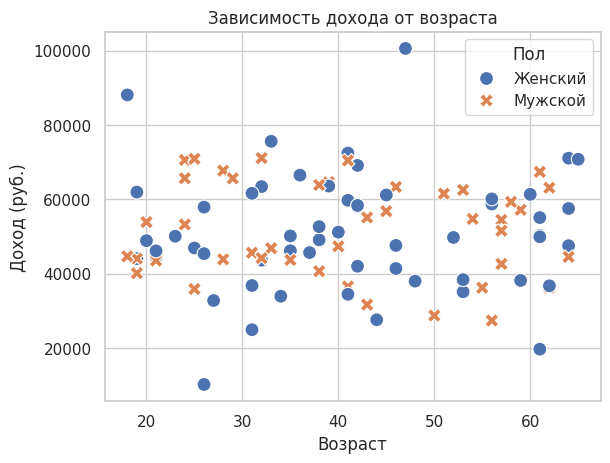

In [57]:
print("\nДиаграмма рассеяния: Возраст vs Доход")
sns.scatterplot(x='Возраст', y='Доход', data=df, hue='Пол', style='Пол', s=100)
plt.title('Зависимость дохода от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доход (руб.)')
plt.show()

Коробчатая диаграмма (boxplot)


Коробчатая диаграмма: Доход по уровню образования


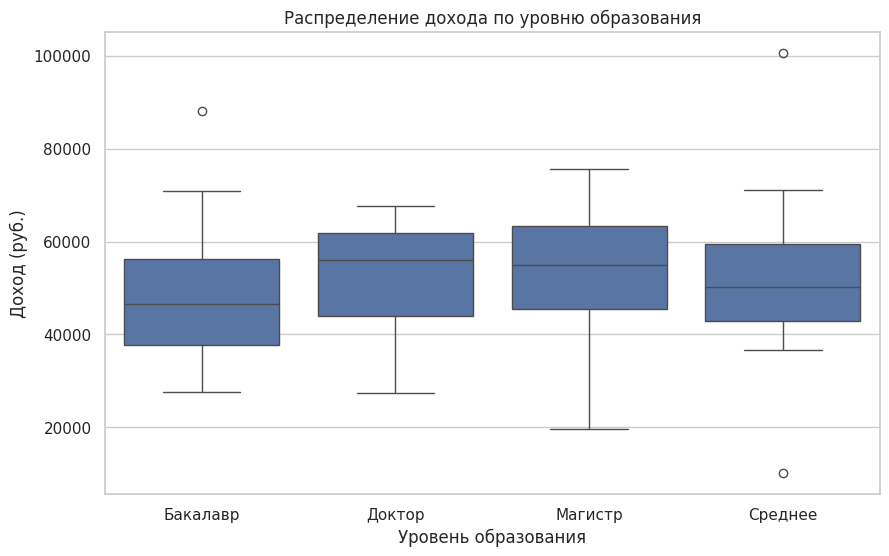

In [58]:
print("\nКоробчатая диаграмма: Доход по уровню образования")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Уровень образования', y='Доход', data=df)
plt.title('Распределение дохода по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Доход (руб.)')
plt.show()

Столбчатая диаграмма


Столбчатая диаграмма: Распределение по уровню образования


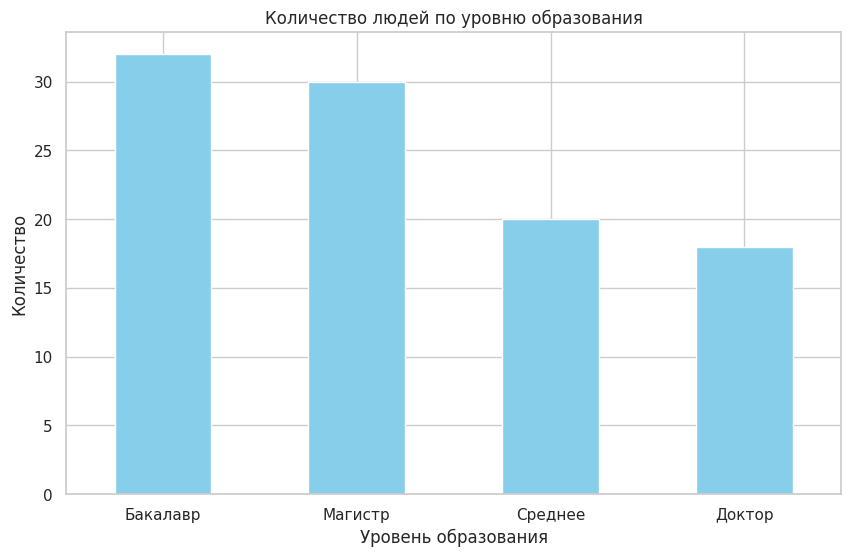

In [59]:
print("\nСтолбчатая диаграмма: Распределение по уровню образования")
plt.figure(figsize=(10, 6))
df['Уровень образования'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Количество людей по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Круговая диаграмма


Круговая диаграмма: Распределение по полу


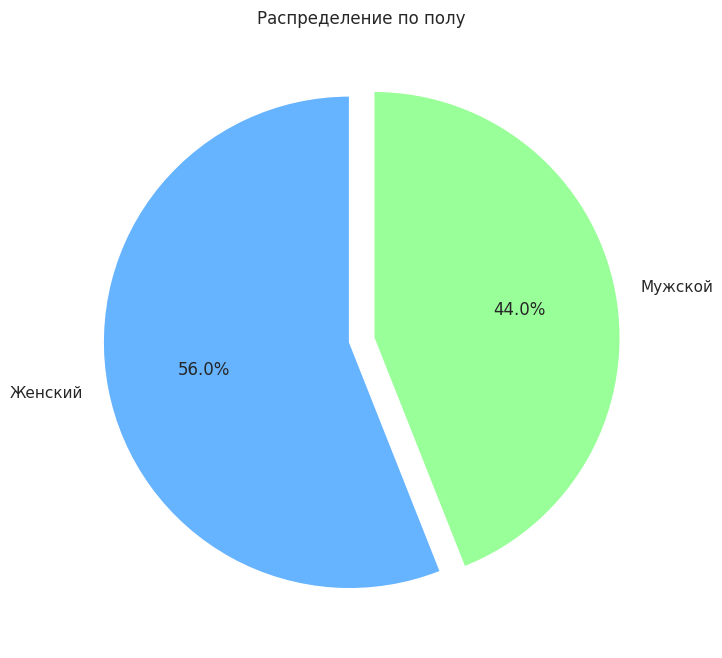

In [60]:
print("\nКруговая диаграмма: Распределение по полу")
plt.figure(figsize=(8, 8))
df['Пол'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99'],
    explode=[0.05, 0.05]
)
plt.title('Распределение по полу')
plt.ylabel('')  # Убираем метку оси Y
plt.show()

Дополнительные метрики

In [61]:
print("\nДополнительные метрики для дохода:")
print(f"Среднее значение: {df['Доход'].mean():.2f} руб.")
print(f"Медиана: {df['Доход'].median():.2f} руб.")
print(f"Стандартное отклонение: {df['Доход'].std():.2f} руб.")
print(f"Минимальное значение: {df['Доход'].min()} руб.")
print(f"Максимальное значение: {df['Доход'].max()} руб.")


Дополнительные метрики для дохода:
Среднее значение: 51353.61 руб.
Медиана: 50098.00 руб.
Стандартное отклонение: 14384.01 руб.
Минимальное значение: 10172 руб.
Максимальное значение: 100584 руб.


Корреляция между числовыми переменными


Корреляция между числовыми переменными:


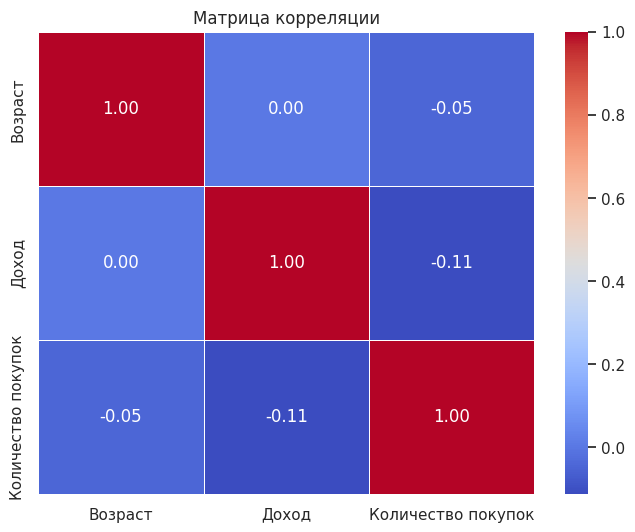

In [62]:
print("\nКорреляция между числовыми переменными:")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

# Кадры данных и индексы

Работа с индексами в pandas

In [63]:
import pandas as pd
import numpy as np
from datetime import datetime

Создаем пример данных для демонстрации

In [64]:
data = {
    'ID': [101, 102, 103, 104, 105],
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [25, 30, 35, 40, 45],
    'Город': ['Москва', 'Санкт-Петербург', 'Москва', 'Казань', 'Санкт-Петербург'],
    'Продажи': [1500, 2300, 1800, 3200, 2700]
}
df = pd.DataFrame(data)
print("Исходный датасет:")
display(df)

Исходный датасет:


,ID,Имя,Возраст,Город,Продажи
0,101,Анна,25,Москва,1500
1,102,Борис,30,Санкт-Петербург,2300
2,103,Виктор,35,Москва,1800
3,104,Галина,40,Казань,3200
4,105,Дмитрий,45,Санкт-Петербург,2700


Автоматический индекс

In [65]:
print("\n=== Автоматический индекс ===")
print("Текущий индекс (по умолчанию):")
print(df.index)
print("\nТип индекса:", type(df.index))


=== Автоматический индекс ===
Текущий индекс (по умолчанию):
RangeIndex(start=0, stop=5, step=1)

Тип индекса: <class 'pandas.core.indexes.range.RangeIndex'>


Установка пользовательского индекса

In [66]:
print("\n=== Установка пользовательского индекса ===")
df_user = df.set_index('ID')
print("Датасет с индексом по ID:")
display(df_user)
print("\nНовый индекс:")
print(df_user.index)
print("Тип индекса после установки:", type(df_user.index))


=== Установка пользовательского индекса ===
Датасет с индексом по ID:


,Имя,Возраст,Город,Продажи
ID,,,,
101,Анна,25,Москва,1500
102,Борис,30,Санкт-Петербург,2300
103,Виктор,35,Москва,1800
104,Галина,40,Казань,3200
105,Дмитрий,45,Санкт-Петербург,2700



Новый индекс:
Index([101, 102, 103, 104, 105], dtype='int64', name='ID')
Тип индекса после установки: <class 'pandas.core.indexes.base.Index'>


Многоуровневый (иерархический) индекс

In [67]:
print("\n=== Многоуровневый индекс ===")
df_multi = df.set_index(['Город', 'Возраст'])
print("Датасет с многоуровневым индексом (Город, Возраст):")
display(df_multi)
print("\nУровни индекса:", df_multi.index.names)
print("Количество уровней:", df_multi.index.nlevels)


=== Многоуровневый индекс ===
Датасет с многоуровневым индексом (Город, Возраст):


,,ID,Имя,Продажи
Город,Возраст,,,
Москва,25,101,Анна,1500
Санкт-Петербург,30,102,Борис,2300
Москва,35,103,Виктор,1800
Казань,40,104,Галина,3200
Санкт-Петербург,45,105,Дмитрий,2700



Уровни индекса: ['Город', 'Возраст']
Количество уровней: 2


Доступ к данным через иерархический индекс

In [68]:
print("\n=== Доступ к данным через иерархический индекс ===")


=== Доступ к данным через иерархический индекс ===


Доступ к конкретной ячейке

In [69]:
print("\nДанные для Москвы, возраст 25:")
display(df_multi.loc[('Москва', 25)])


Данные для Москвы, возраст 25:


,Москва
,25
ID,101
Имя,Анна
Продажи,1500


Доступ ко всем строкам для конкретного города

In [70]:
print("\nВсе данные для Санкт-Петербурга:")
display(df_multi.xs('Санкт-Петербург', level='Город'))


Все данные для Санкт-Петербурга:


,ID,Имя,Продажи
Возраст,,,
30,102,Борис,2300
45,105,Дмитрий,2700


Доступ по нескольким уровням с использованием slice

In [71]:
print("\nДанные для всех возрастов в Москве:")
display(df_multi.loc[('Москва', slice(None))])


Данные для всех возрастов в Москве:


,ID,Имя,Продажи
Возраст,,,
25,101,Анна,1500
35,103,Виктор,1800


Возврат к обычному индексу (сброс индекса)

In [72]:
print("\n=== Возврат к обычному индексу ===")
df_reset = df_multi.reset_index()
print("Датасет после сброса индекса:")
display(df_reset)
print("\nТекущий индекс после сброса:")
print(df_reset.index)


=== Возврат к обычному индексу ===
Датасет после сброса индекса:


,Город,Возраст,ID,Имя,Продажи
0,Москва,25,101,Анна,1500
1,Санкт-Петербург,30,102,Борис,2300
2,Москва,35,103,Виктор,1800
3,Казань,40,104,Галина,3200
4,Санкт-Петербург,45,105,Дмитрий,2700



Текущий индекс после сброса:
RangeIndex(start=0, stop=5, step=1)


Использование индекса для временных рядов

In [73]:
print("\n=== Использование индекса для временных рядов ===")
# Создаем временной ряд с датами
dates = pd.date_range(start='2023-01-01', periods=7, freq='D')
sales_data = [1200, 1500, 1300, 1800, 2100, 1900, 2400]
time_series = pd.Series(sales_data, index=dates, name='Продажи')
print("Временной ряд с датами в индексе:")
display(time_series)


=== Использование индекса для временных рядов ===
Временной ряд с датами в индексе:


,Продажи
2023-01-01,1200
2023-01-02,1500
2023-01-03,1300
2023-01-04,1800
2023-01-05,2100
2023-01-06,1900
2023-01-07,2400


Доступ по дате

In [74]:
print("\nПродажи за 2023-01-05:")
print(time_series['2023-01-05'])


Продажи за 2023-01-05:
2100


Срез по диапазону дат

In [75]:
print("\nПродажи с 2023-01-03 по 2023-01-06:")
print(time_series['2023-01-03':'2023-01-06'])


Продажи с 2023-01-03 по 2023-01-06:
2023-01-03    1300
2023-01-04    1800
2023-01-05    2100
2023-01-06    1900
Freq: D, Name: Продажи, dtype: int64


Преобразование в DataFrame с временным индексом

In [76]:
df_time = time_series.to_frame()
print("\nDataFrame с временным индексом:")
display(df_time)


DataFrame с временным индексом:


,Продажи
2023-01-01,1200
2023-01-02,1500
2023-01-03,1300
2023-01-04,1800
2023-01-05,2100
2023-01-06,1900
2023-01-07,2400


Пример сортировки по индексу

In [77]:
print("\nСортировка по индексу (датам):")
sorted_df = df_time.sort_index()
display(sorted_df)


Сортировка по индексу (датам):


,Продажи
2023-01-01,1200
2023-01-02,1500
2023-01-03,1300
2023-01-04,1800
2023-01-05,2100
2023-01-06,1900
2023-01-07,2400


# Оценка центрального положения

Создаем пример данных с выбросом

In [78]:
import numpy as np
import pandas as pd

data = np.array([1000, 2000, 3000, 4000, 5000, 100000])  # Выброс 100000
weights = np.array([1, 1, 1, 1, 1, 10])  # Веса для взвешенных мер

Создаем DataFrame для наглядности

In [79]:
df = pd.DataFrame({
    'Значение': data,
    'Вес': weights
})

print("Исходные данные:")
display(df)
print("\n" + "="*50 + "\n")

Исходные данные:


,Значение,Вес
0,1000,1
1,2000,1
2,3000,1
3,4000,1
4,5000,1
5,100000,10


1. Среднее (mean)

In [80]:
mean_value = np.mean(data)
print("1. Среднее значение (mean):")
print(f"Расчет: ({' + '.join(map(str, data))}) / {len(data)} = {mean_value:.2f}")
print(f"Результат: {mean_value:.2f}")
print("Пояснение: Среднее очень чувствительно к выбросам (100000 сильно завышает значение)")


1. Среднее значение (mean):
Расчет: (1000 + 2000 + 3000 + 4000 + 5000 + 100000) / 6 = 19166.67
Результат: 19166.67
Пояснение: Среднее очень чувствительно к выбросам (100000 сильно завышает значение)


2. Медиана (median)

In [81]:
median_value = np.median(data)
print("\n2. Медиана (median):")
sorted_data = np.sort(data)
print(f"Упорядоченные данные: {sorted_data}")
print(f"Медиана (среднее значение 3-го и 4-го элемента): ({sorted_data[2]} + {sorted_data[3]}) / 2 = {median_value:.2f}")
print("Пояснение: Медиана устойчива к выбросам и отражает 'середину' данных")



2. Медиана (median):
Упорядоченные данные: [  1000   2000   3000   4000   5000 100000]
Медиана (среднее значение 3-го и 4-го элемента): (3000 + 4000) / 2 = 3500.00
Пояснение: Медиана устойчива к выбросам и отражает 'середину' данных


3. Усечённое среднее (trimmed mean)

In [82]:
def trimmed_mean(data, proportion=0.1):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    cut = int(n * proportion)
    trimmed = sorted_data[cut:-cut]
    return np.mean(trimmed)

trimmed_mean_value = trimmed_mean(data, proportion=0.1)
print("\n3. Усечённое среднее (trimmed mean, 10%):")
print(f"Удаляем 10% данных с каждого конца (1 элемент)")
print(f"Оставшиеся данные: {np.sort(data)[1:-1]}")
print(f"Усеченное среднее: {trimmed_mean_value:.2f}")
print("Пояснение: Усеченное среднее устойчиво к выбросам, но сохраняет информацию из большей части данных")



3. Усечённое среднее (trimmed mean, 10%):
Удаляем 10% данных с каждого конца (1 элемент)
Оставшиеся данные: [2000 3000 4000 5000]
Усеченное среднее: nan
Пояснение: Усеченное среднее устойчиво к выбросам, но сохраняет информацию из большей части данных


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


4. Взвешенное среднее (weighted mean)

In [83]:
weighted_mean = np.average(data, weights=weights)
print("\n4. Взвешенное среднее (weighted mean):")
weighted_sum = np.sum(data * weights)
total_weight = np.sum(weights)
print(f"Расчет: ({' + '.join([f'{d}*{w}' for d, w in zip(data, weights)])}) / {total_weight}")
print(f"= {weighted_sum} / {total_weight} = {weighted_mean:.2f}")
print("Пояснение: Высокий вес для выброса (10) сильно влияет на результат")



4. Взвешенное среднее (weighted mean):
Расчет: (1000*1 + 2000*1 + 3000*1 + 4000*1 + 5000*1 + 100000*10) / 15
= 1015000 / 15 = 67666.67
Пояснение: Высокий вес для выброса (10) сильно влияет на результат


5. Взвешенная медиана

In [84]:
def weighted_median(values, weights):
    # Сортируем данные по значениям
    sorted_indices = np.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_weights = weights[sorted_indices]

    # Накопленная сумма весов
    cumsum = np.cumsum(sorted_weights)
    total = cumsum[-1]
    half = total / 2

    # Находим индекс, где накопленная сумма >= половины
    idx = np.where(cumsum >= half)[0][0]
    return sorted_values[idx]

weighted_median_value = weighted_median(data, weights)
print("\n5. Взвешенная медиана:")
print(f"Сумма всех весов: {np.sum(weights)}")
print(f"Половина суммы весов: {np.sum(weights)/2:.1f}")
print("Накопленная сумма весов по отсортированным данным:")
for i, (val, w, cum) in enumerate(zip(data, weights, np.cumsum(weights))):
    print(f"  Значение {val} (вес {w}): накопленно {cum}")
print(f"Медиана = {weighted_median_value}")
print("Пояснение: Взвешенная медиана определяется по накопленным весам, а не по количеству элементов")



5. Взвешенная медиана:
Сумма всех весов: 15
Половина суммы весов: 7.5
Накопленная сумма весов по отсортированным данным:
  Значение 1000 (вес 1): накопленно 1
  Значение 2000 (вес 1): накопленно 2
  Значение 3000 (вес 1): накопленно 3
  Значение 4000 (вес 1): накопленно 4
  Значение 5000 (вес 1): накопленно 5
  Значение 100000 (вес 10): накопленно 15
Медиана = 100000
Пояснение: Взвешенная медиана определяется по накопленным весам, а не по количеству элементов


Визуализация для наглядности

In [85]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Сравнение мер центральной тенденции

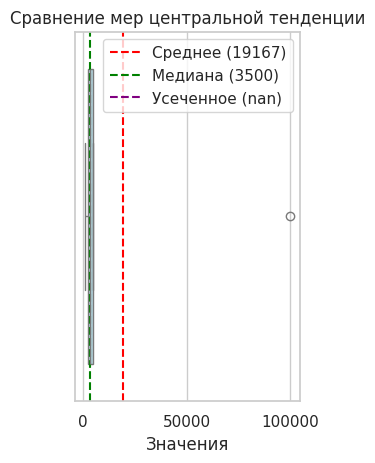

In [86]:
plt.subplot(1, 2, 1)
sns.boxplot(x=data, color='lightblue')
plt.axvline(mean_value, color='red', linestyle='--', label=f'Среднее ({mean_value:.0f})')
plt.axvline(median_value, color='green', linestyle='--', label=f'Медиана ({median_value:.0f})')
plt.axvline(trimmed_mean_value, color='purple', linestyle='--', label=f'Усеченное ({trimmed_mean_value:.0f})')
plt.title('Сравнение мер центральной тенденции')
plt.xlabel('Значения')
plt.legend()

Взвешенные меры

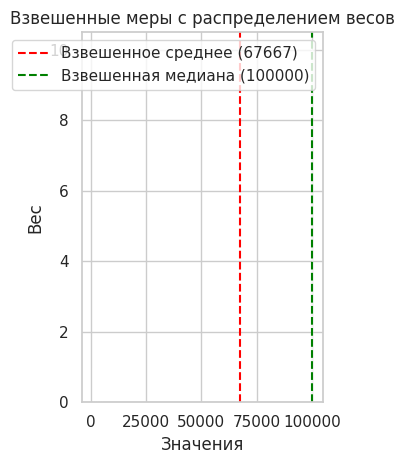

In [87]:
plt.subplot(1, 2, 2)
plt.bar(df['Значение'], df['Вес'], color='skyblue', alpha=0.7)
plt.axvline(weighted_mean, color='red', linestyle='--', label=f'Взвешенное среднее ({weighted_mean:.0f})')
plt.axvline(weighted_median_value, color='green', linestyle='--', label=f'Взвешенная медиана ({weighted_median_value:.0f})')
plt.title('Взвешенные меры с распределением весов')
plt.xlabel('Значения')
plt.ylabel('Вес')
plt.legend()

plt.tight_layout()
plt.show()